In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("MAXE.csv")

In [5]:
df1.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,686.25,684.80,689.90,673.50,461.14K,0.21%
1,12/28/2023,684.80,680.85,688.80,679.25,556.32K,1.02%
2,12/27/2023,677.90,678.00,683.05,668.65,712.86K,0.45%
3,12/26/2023,674.85,654.00,680.00,651.40,1.13M,4.00%
4,12/22/2023,648.90,656.70,656.70,636.05,1.11M,-0.15%


In [7]:
df2 = pd.read_csv("SUN.csv")

In [9]:
df2['Price'] = df2['Price'].str.replace(',', '').astype(float)

In [11]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,1259.45,"1,262.10","1,271.95","1,252.55",1.84M,-0.21%
1,12/28/2023,1262.15,"1,254.95","1,264.65","1,249.55",2.04M,0.77%
2,12/27/2023,1252.45,"1,250.00","1,255.40","1,241.25",2.01M,0.40%
3,12/26/2023,1247.50,"1,243.65","1,250.00","1,239.30",1.80M,0.31%
4,12/22/2023,1243.65,"1,240.00","1,251.00","1,236.05",2.06M,0.82%


In [13]:
datasets = {'MAXE.csv': df1, 'SUN.csv': df2,}

##  Shapiro-Wilk Test


Normality Test for MAXE.csv
Shapiro-Wilk Test for Price: Statistics=0.965, p-value=0.000
Price does not follow a normal distribution (reject H0)


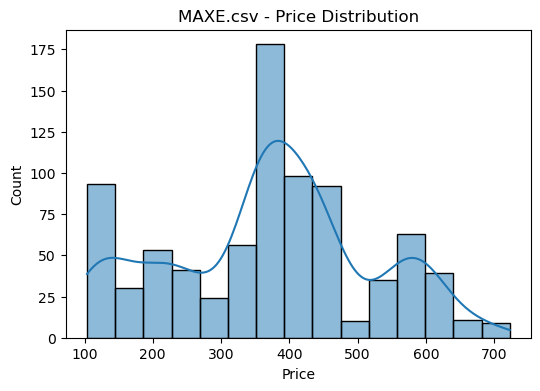


Normality Test for SUN.csv
Shapiro-Wilk Test for Price: Statistics=0.914, p-value=0.000
Price does not follow a normal distribution (reject H0)


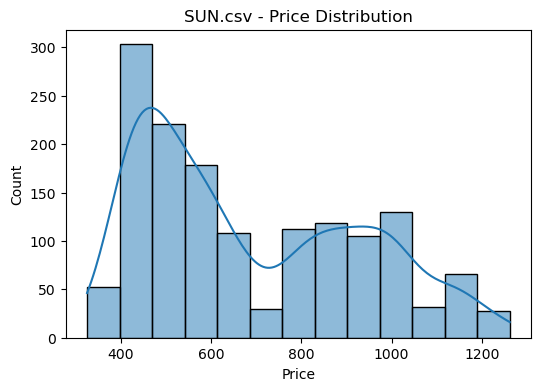

In [15]:
# Function to test normality using Shapiro-Wilk test
def test_normality(data, column):
    stat, p = stats.shapiro(data[column].dropna())  # Remove missing values if any
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat:.3f}, p-value={p:.3f}')
    if p > 0.05:
        print(f"{column} seems to follow a normal distribution (fail to reject H0)")
    else:
        print(f"{column} does not follow a normal distribution (reject H0)")

# Plot the data distribution and perform Shapiro-Wilk test for each dataset
for name, df in datasets.items():
    print(f"\nNormality Test for {name}")
     # Test Normality
    test_normality(df,'Price')
            
    # Plot distribution
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Price'].dropna(), kde=True)
    plt.title(f'{name} - Price Distribution')
    plt.show()

## CHI SQUARE TEST


Chi-Square Test for MAXE.csv
Chi-Square Test for Price: Statistics=397.904, p-value=0.000
Price significantly differs from the expected distribution (reject H0)


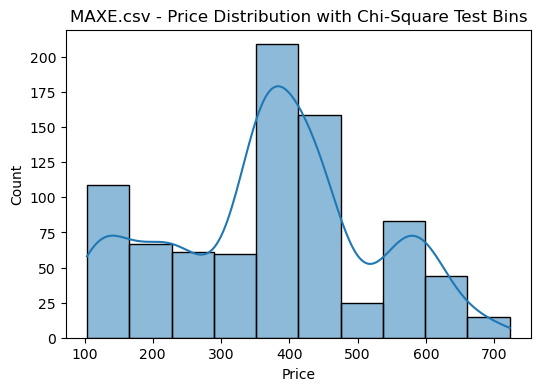


Chi-Square Test for SUN.csv
Chi-Square Test for Price: Statistics=563.628, p-value=0.000
Price significantly differs from the expected distribution (reject H0)


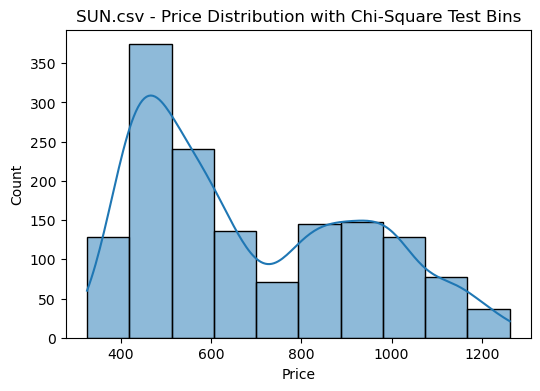

In [19]:
# Function to test goodness of fit using Chi-Square test
def test_chi_square(data, column, bins=10):
    # Drop missing values and bin data into specified number of bins
    observed_values, bin_edges = np.histogram(data[column].dropna(), bins=bins)
    
    # Calculate the expected frequency assuming a uniform distribution
    expected_values = [len(data[column].dropna()) / bins] * bins
    
    # Perform Chi-Square test
    stat, p = stats.chisquare(observed_values, f_exp=expected_values)
    print(f'Chi-Square Test for {column}: Statistics={stat:.3f}, p-value={p:.3f}')
    if p > 0.05:
        print(f"{column} does not significantly differ from the expected distribution (fail to reject H0)")
    else:
        print(f"{column} significantly differs from the expected distribution (reject H0)")

# Loop through each dataset and apply Chi-Square test
for name, df in datasets.items():
    print(f"\nChi-Square Test for {name}")
    
    
    
    test_chi_square(df,'Price', bins=10)
            
    # Plot histogram with KDE overlay
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Price'].dropna(), kde=True, bins=10)
    plt.title(f'{name} - Price Distribution with Chi-Square Test Bins')
    plt.show()
